<a href="https://colab.research.google.com/github/KarolineCostadaSilva/curso_fotografia_computacional/blob/main/Semana%202/Processamento_de_Imagens_Coloridas_parte_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Processamento de Imagens Coloridas

In [ ]:
!git clone https://github.com/kevinruiz182/image_processing_tools.git

fatal: destination path 'image_processing_tools' already exists and is not an empty directory.


In [ ]:
# Importar bibliotecas...
from google.colab import drive
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from skimage.color import *
import numpy as np
from PIL import Image
from matplotlib.colors import Normalize, ListedColormap, BoundaryNorm
from matplotlib.cm import ScalarMappable

## Modelos de cores

### Esquema do cubo de cores RGB.

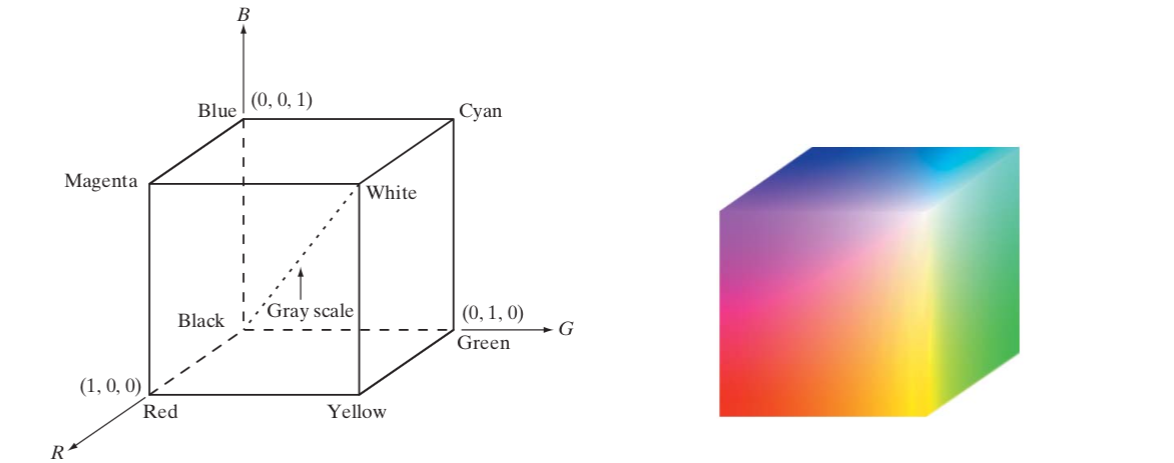

Text(0.5, 1.0, '(R,G,0)')

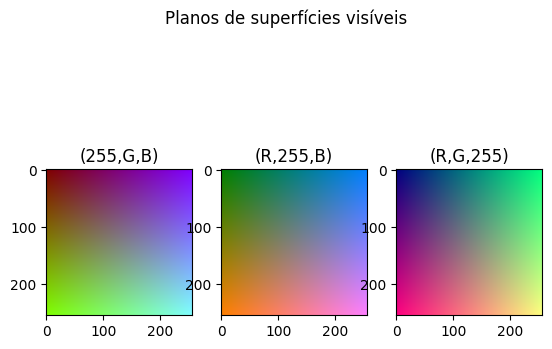

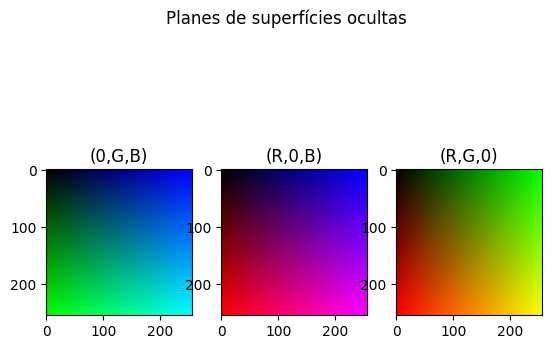

In [ ]:
# Definição dos arrays (planos de cores) R, G e B, com
r_array = np.zeros((256,256,1), dtype=int)+127 # iguala todos os pixels do canal R ao tom de cinza 127
g_array = np.zeros((256,256,1), dtype=int)
b_array = np.zeros((256,256,1), dtype=int)
for i in range(256): # Coloca em nível crescente de cinza os planos G e B
  g_array[:,i,0] = i
  b_array[i,:,0] = i

x = np.ones((256,256,1), dtype=int)*127 # iguala todos os pixels do canal R, sob a variavel x, ao tom de cinza 127
y = g_array
z = b_array


# Apresenta imagens coloridas com alternância dos planos iguais a 255  na ordem: R, G e B

fig,ax = plt.subplots(1,3)
plt.suptitle('Planos de superfícies visíveis')
ax[0].imshow(np.concatenate((x,z,y), axis=-1))
ax[0].set_title('(255,G,B)')
ax[1].imshow(np.concatenate((z,x,y), axis=-1))
ax[1].set_title('(R,255,B)')
ax[2].imshow(np.concatenate((z,y,x), axis=-1))
ax[2].set_title('(R,G,255)')

# Apresenta imagens coloridas com alternância dos planos iguais a zero na ordem: R, G e B

x = x*0
fig,ax = plt.subplots(1,3)
plt.suptitle('Planes de superfícies ocultas')
ax[0].imshow(np.concatenate((x,z,y), axis=-1))
ax[0].set_title('(0,G,B)')
ax[1].imshow(np.concatenate((z,x,y), axis=-1))
ax[1].set_title('(R,0,B)')
ax[2].imshow(np.concatenate((z,y,x), axis=-1))
ax[2].set_title('(R,G,0)')

Text(0.5, 1.0, 'Plano de corte transversal (127,G,B): ver referência bibliográfica Gonzalez e Woods')

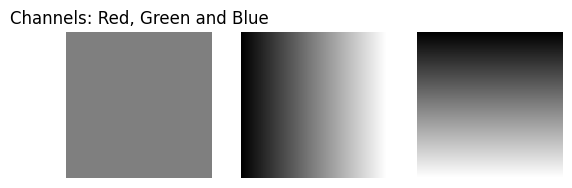

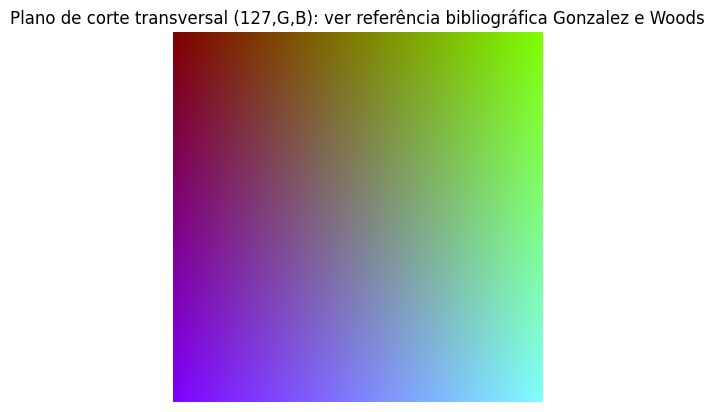

In [ ]:
rgb_array = np.concatenate((r_array, g_array, b_array), axis=-1)

fig,ax=plt.subplots(1,3)
ax[0].imshow(np.squeeze(r_array), cmap='gray', vmin=0, vmax=255)
ax[0].axis('off')
ax[0].set_title('Red')
ax[1].imshow(np.squeeze(g_array), cmap='gray', vmin=0, vmax=255)
ax[1].axis('off')
ax[0].set_title('Green')
ax[2].imshow(np.squeeze(b_array), cmap='gray', vmin=0, vmax=255)
ax[2].axis('off')
ax[0].set_title('Channels: Red, Green and Blue')

plt.figure()
plt.imshow(rgb_array)
plt.axis('off')
plt.title('Plano de corte transversal (127,G,B): ver referência bibliográfica Gonzalez e Woods')

### Conversões de RGB para CMY(K)

**RGB para CMY para valores normalizados (divisão por 255)**

$ \begin{matrix} C \\ M \\ Y \end{matrix} = \begin{matrix} 1 \\ 1 \\ 1 \end{matrix} - \begin{matrix} R \\ G \\ B \end{matrix}$

**CMY para CMYK**

$K = min(C,M,Y)$

Se K for igual a 1, implica C=M=Y=0.
Caso contrário:

$C = \frac{C-K}{1-K}$

$M = \frac{M-K}{1-K}$

$Y = \frac{Y-K}{1-K}$

##Para apresentação visual dos canais YMCK em níveis de cinza é necessário multiplicar por 255 (denormalizar)

##Conversão de RGB to CMY e depois de CMY para CMYK usando operações sobre pixels por meio da biblioteca numpy

In [ ]:
def rgb2cmyk(img):
  #conversão de RGB para CMY (a ser normalizada depois dividindo por 255)
  c = 255-img[:,:,0]
  m = 255-img[:,:,1]
  y = 255-img[:,:,2]

  c_ = np.copy(c).astype(np.float32)
  m_ = np.copy(m).astype(np.float32)
  y_ = np.copy(y).astype(np.float32)

  c_ = c_/255
  m_ = m_/255
  y_ = y_/255

  #Operações de conversão sobre os pixels através da biblioteca numpy (as np)

  k_ = np.minimum(np.minimum(c_,m_),y_)

  c = np.expand_dims(255 * (c_-k_) / (1-k_), axis=-1)
  m = np.expand_dims(255 * (m_-k_) / (1-k_), axis=-1)
  y = np.expand_dims(255 * (y_-k_) / (1-k_), axis=-1)
  k = np.expand_dims(255 * k_, axis=-1)

  cmyk = np.array(np.concatenate((c,m,y,k), axis=-1), dtype=int)
  func = "Operações de conversão sobre os pixels através da biblioteca numpy (as np)"
  return img, cmyk, func

##Conversão de RGB to CMY e depois de CMY para CMYK, mas aqui com operações pixel a pixel (processamento mais demorado!). Deixar como exercício fazer o cálculo do tempo de processamento para essas 2 funções **rgb2cmyk**

In [ ]:
# Definição da função de conversão através de operaçoes pixel a  pixel em loops
def rgb2cmyk(img):
  #conversão de RGB para CMY (a ser normalizada depois dividindo por 255)
  c = 255 - img[:, :, 0]
  m = 255 - img[:, :, 1]
  y = 255 - img[:, :, 2]

  c_ = np.copy(c).astype(np.float32)
  m_ = np.copy(m).astype(np.float32)
  y_ = np.copy(y).astype(np.float32)

  c_ = c_/255
  m_ = m_/255
  y_ = y_/255


  K = np.zeros_like(c_)
  C = np.zeros_like(c_)
  M = np.zeros_like(c_)
  Y = np.zeros_like(c_)

  # Loops para operações de conversão pixel a pixel ao longo da imagem
  for i in range(c.shape[0]):
      for j in range(c.shape[1]):

          K[i, j] = min(c_[i, j], m_[i, j], y_[i, j])
          if K[i, j] == 1:
              C[i, j] = 0
              M[i, j] = 0
              Y[i, j] = 0
          else:
              C[i, j] = (c_[i, j] - K[i, j])/float((1 - K[i, j]))
              M[i, j] = (m_[i, j] - K[i, j])/float((1 - K[i, j]))
              Y[i, j] = (y_[i, j] - K[i, j])/float((1 - K[i, j]))

  #Denormalização para escalas de cinza [0,255]
  C = C*255
  M = M*255
  Y = Y*255
  K = K*255
  cmyk = np.dstack((C,M,Y,K)).astype(np.uint8)

  # cmyk = (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)
  func = "Operações de conversão pixel a pixel ao longo da imagem via loop duplo"
  return img, cmyk, func

(899, 719, 4)
Operações de conversão pixel a pixel ao longo da imagem via loop duplo


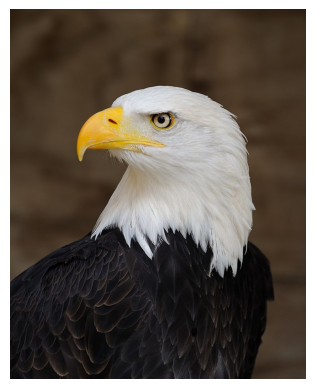

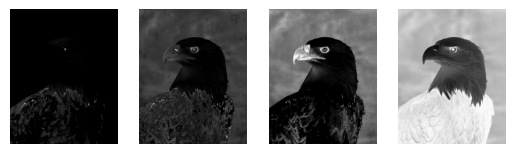

In [ ]:
# Leitura da imagem
img_eagle = imageio.imread('image_processing_tools/images/color_image_processing/bald_eagle_portrait.jpg')

# Chamada para a função de conversão rgb2cmyk
img, img_eagle_cmyk, func = rgb2cmyk(img_eagle)
print(img_eagle_cmyk.shape)
print(func)

# Apresentação da imagem original
plt.imshow(img)
plt.axis('off')

#Apresentação dos canais CMYK em tons de cinza
fig,ax = plt.subplots(1,4)
for idx in range(4):
  ax[idx].imshow(img_eagle_cmyk[:,:,idx], cmap='gray', vmin=0, vmax=255)
  ax[idx].axis('off')


### HSI

O modelo de cores HSI baseado em planos de cores (Triangular - Circular)

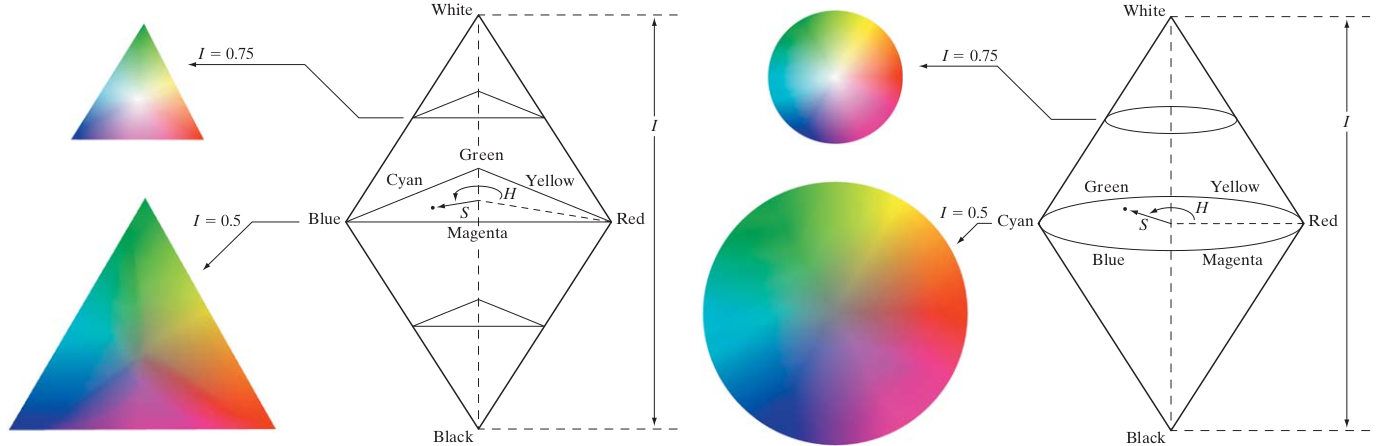

Conversão de RGB para HSI



*   $H = \begin{matrix} \theta & \mbox{se } B \leq G \\
360 - \theta  & \mbox{se } B > G
\end{matrix} $

com

$\theta = cos^{-1} \frac{\frac{1}{2}[(R-G)+(R-B)]}{[(R-G)^2 + (R-B)(G-B)]^{1/2}}$

\\

*   $S = 1 - \frac{3}{(R+G+B)} [min(R,G,B)]$

\\

* $I = \frac{1}{3}(R+G+B)$

##Definição da função de conversão

In [ ]:
def rgb2hsi(img):
    #Normalização
    r = img[:,:,0]/255
    g = img[:,:,1]/255
    b = img[:,:,2]/255

    # Operações matemáticas para conversão RGB -> HSI, utilizando a biblioteca numpy (as np)
    d_rg = r - g
    d_rb = r - b
    d_gb = g - b
    num = (d_rg + d_rb)/2
    den = np.sqrt(np.square(d_rg) + (d_rb*d_gb)) + 0.00001
    frac = num / den
    theta = np.arccos( frac )
    theta = (theta / np.pi)*180

    h = np.where(b <= g, theta, 360-theta)
    h = h/360

    s = 1 - (3/(r+g+b+0.000001))*np.minimum(np.minimum(r,g),b)

    i = (r+g+b)/3

    h = np.expand_dims(h, axis=-1)
    s = np.expand_dims(s, axis=-1)
    i = np.expand_dims(i, axis=-1)

    hsi = np.concatenate((h,s,i), axis=-1)

    #Denormalização !
    HSI = (np.dstack((h,s,i)) * 255).astype(np.uint8)
    func = "Operações de conversão sobre os pixels através da biblioteca numpy (as np)"
    return img, HSI, func



##Exemplo da transformação RGB -> HSI, apresentando os 3 canais H, S e I

(899, 719, 3)
Operações de conversão sobre os pixels através da biblioteca numpy (as np)


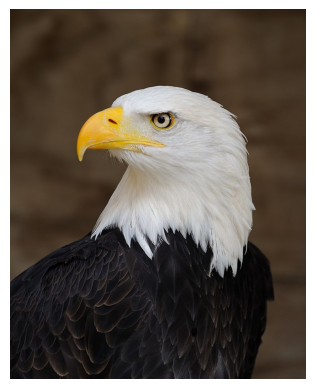

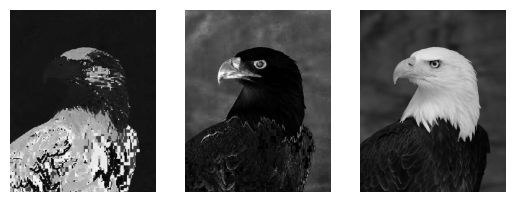

In [ ]:
#Leitura da imagem
img_eagle = imageio.imread('image_processing_tools/images/color_image_processing/bald_eagle_portrait.jpg')

#Conversão da imagem para o modelo HSI
img, img_eagle_cmyk, func = rgb2hsi(img_eagle)
print(img_eagle_cmyk.shape)
print(func)

#Apresentação da imagem original
plt.imshow(img)
plt.axis('off')

#Apresentação de cada canal HSI
fig,ax = plt.subplots(1,3)
for idx in range(3):
  ax[idx].imshow(img_eagle_cmyk[:,:,idx], cmap='gray', vmin=0, vmax=255)
  ax[idx].axis('off')


## Processamento de imagens em pseudo-cores: exemplo do mapeamento sobre uma imagem da Tireoide

img_thyroid.shape =  (798, 798, 3)
0
128


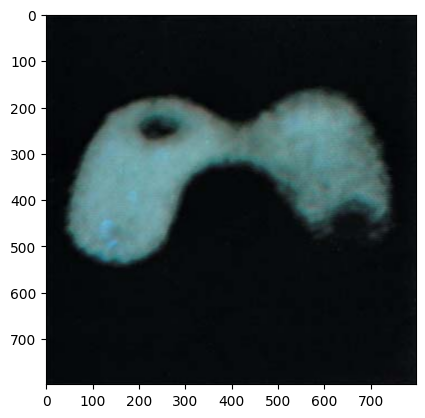

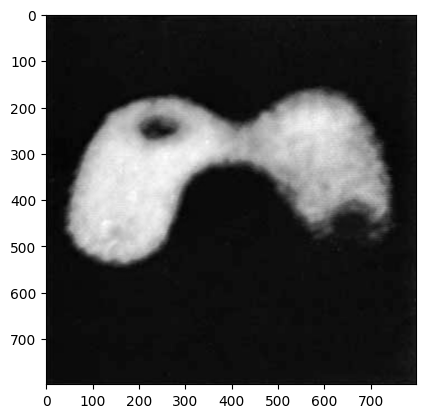

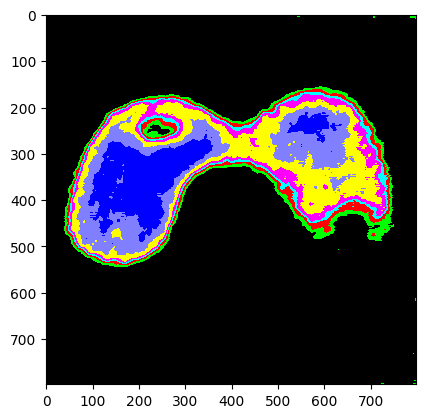

In [ ]:
#Imagem carregada (em img_thyroid)
img_thyroid = imageio.imread('image_processing_tools/images/color_image_processing/thyroid.png')[:,:,:3]
print("img_thyroid.shape = ",img_thyroid.shape)

#Apresentação da imagem original
plt.figure()
plt.imshow(img_thyroid, cmap='gray')

 #Conversão para tons de cinza
img = rgb2gray(img_thyroid)
img_thyroid = rgb2gray(img_thyroid)

# img_thyroid_p recebe uma cópia da imagem convertida em tons de cinza
img_thyroid_p = img_thyroid

#Apresentação da imagem original, porém agora convertida em tons de cinza
plt.figure()
plt.imshow(img_thyroid, cmap='gray')

L = np.arange(0, 256, 128)

#Mapeamento em 8 cores conforme os valores atribuidos para a variavel cmap
cmap = ListedColormap([[0,0,0],[0,1,0], [1,0,0], [0,1,1], [1,0,1], [1,1,0],[0.5,0.5,1], [0,0,1]])

#Realização do mapeamento por comparação com os limiares em L
plt.figure()
for l in L:
  img_thyroid_p = np.where(img_thyroid>l, l, img_thyroid)# Comparação com os limiares

#Apresentação da imagem mapeada
plt.imshow(img_thyroid_p, cmap=cmap)

##Processamento de imagens em pseudo-cores com binarização: exemplo do mapeamento sobre uma imagem em raios-X de uma solda

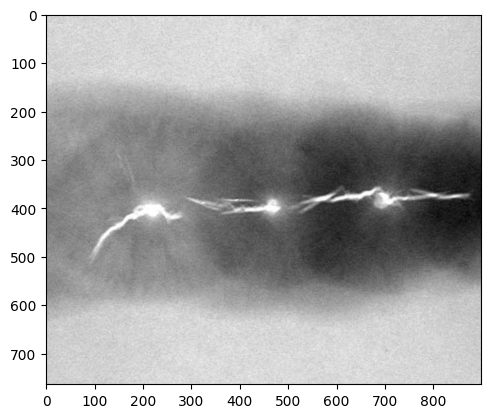

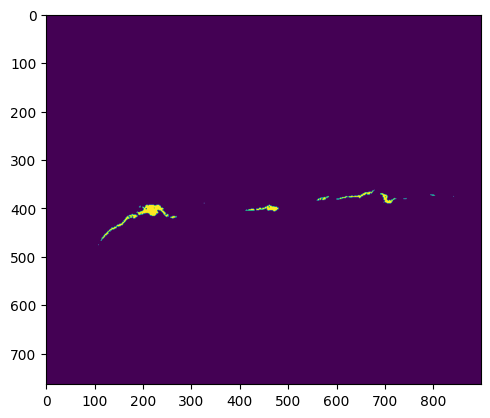

In [ ]:
#Leitura da imagem em Raios-X
img_xray = imageio.imread('image_processing_tools/images/color_image_processing/xray.png')[:,:,:3]
img_xray = np.array(rgb2gray(img_xray)*255, dtype=int) #rgb2gray importada em "skimage.color"
plt.figure()

#Apresentação da imagem original
plt.imshow(img_xray, cmap='gray')

#perceber aqui a operação sobre o limiar (250)
img_xray_p = (img_xray >= 250)
plt.figure()
plt.imshow(img_xray_p)